In [1]:
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt
from numpy.linalg import norm

/Users/claudia/miniconda3/envs/string_sergio_analysis/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
def theta_of_angle(u, s1, s2, s3):
    A = u.select_atoms(s1).center_of_geometry()
    B = u.select_atoms(s2).center_of_geometry()
    C = u.select_atoms(s3).center_of_geometry()

    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

114.60472114714293
165.78183985077166
160.27850265333572


/Users/claudia/miniconda3/envs/string_sergio_analysis/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: CD
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/Users/claudia/miniconda3/envs/string_sergio_analysis/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: LU
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


179.39538725866194
179.43271933754386
[114.60472114714293, 165.78183985077166, 160.27850265333572, 179.39538725866194, 179.43271933754386]


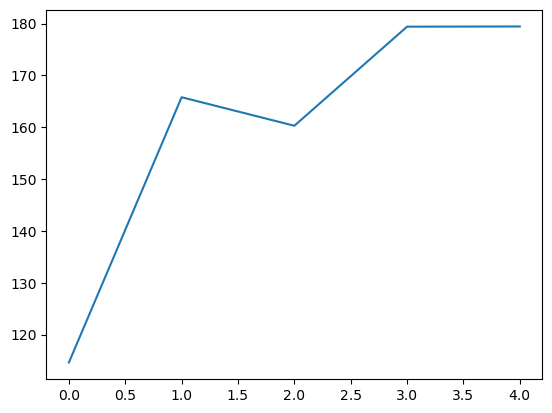

In [24]:
#these = [292, 297, 306]

#        [[5C65 363 377 390],
#         [4ZW9 363 377 390],
#         [6RW3 392 403 417],
#         [4JA3 369 383 396], 
#         [4JA4 369 383 396]]

these_others= np.asarray([[363,377,390],
                          [363,377,390],
                          [392,403,417],
                          [369, 383, 396],
                          [369, 383, 396]])

count = 0

theta_u10 =[]
for ap in ['5c65','4zw9','6rw3','4ja3','4ja4']:
    u = mda.Universe('/Users/claudia/Downloads/%s.pdb' %ap, \
            '/Users/claudia/Downloads/%s.pdb' %ap)
    for ts in u.trajectory:
        theta = theta_of_angle(u, s1 = 'resid %s and backbone' %these_others[count,0], 
                               s2 = 'resid %s and backbone' %these_others[count,1], 
                               s3 = 'resid %s and backbone' %these_others[count,2])
        print (theta)
        theta_u10.append(theta)
    count = count + 1 
    
print (theta_u10)
plt.plot(theta_u10)